# Further Testing
In this notebook we take the last estimated parameters for the classifier in order to predict the family and notes present in audio snippets made in both Ableton and GarageBand applications to further test its performance in not so controlled environments.

The melody is the following:

![MelodyTest](https://github.com/Sirivasv/MCC-AA/raw/master/ProyectoFinal/FurtherTestingScore.PNG)


## Load Estimated Parameters

In [0]:
# First we download the last estimated parameters
!wget -O means_last_model.csv https://github.com/Sirivasv/MCC-AA/raw/master/ProyectoFinal/means_last_model.csv
!wget -O variances_last_model.csv https://github.com/Sirivasv/MCC-AA/raw/master/ProyectoFinal/variances_last_model.csv

--2020-06-12 10:17:04--  https://github.com/Sirivasv/MCC-AA/raw/master/ProyectoFinal/means_last_model.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Sirivasv/MCC-AA/master/ProyectoFinal/means_last_model.csv [following]
--2020-06-12 10:17:05--  https://raw.githubusercontent.com/Sirivasv/MCC-AA/master/ProyectoFinal/means_last_model.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 188652 (184K) [text/plain]
Saving to: ‘means_last_model.csv’

means_last_model.cs 100%[===================>] 184.23K  1.02MB/s    in 0.2s    

2020-06-12 10:17:05 (1.02 MB/s) - ‘means_last_model.csv’ saved [188652/188652]

--2020-06-12 10:17:06--  https:

In [0]:
# We import the required libraries
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display
%matplotlib inline

In [0]:
# Means 
means_per_category = pd.read_csv('means_last_model.csv', index_col=0)
means_per_category.head()

note_24   note_25   note_26   note_27   note_28  \
family_string_note_24  0.205150  0.145316  0.071253  0.063909  0.050619   
family_guitar_note_24  2.959643  1.659520  0.347145  0.207223  0.192532   
family_brass_note_24   0.228506  0.194147  0.086830  0.083973  0.081723   
family_string_note_25  0.125200  0.240140  0.172668  0.076305  0.062873   
family_guitar_note_25  2.910210  4.808948  2.538725  0.444413  0.268343   

                        note_29   note_30   note_31   note_32   note_33  ...  \
family_string_note_24  0.092540  0.126376  0.255405  0.309889  0.328921  ...   
family_guitar_note_24  0.176328  0.145073  0.125310  0.164363  0.208650  ...   
family_brass_note_24   0.046751  0.028952  0.031671  0.036591  0.037761  ...   
family_string_note_25  0.050346  0.086870  0.118121  0.231539  0.301935  ...   
family_guitar_note_25  0.209536  0.172636  0.130620  0.137379  0.182971  ...   

                        note_98   note_99  note_100  note_101  note_102  \
family_string_note_24  0.006262  0.007122  0.004430  0.006080  0.005130   
family_guitar_note_24  0.038614  0.028798  0.023591  0.020875  0.027129   
family_brass_note_24   0.005238  0.004273  0.003892  0.002961  0.001981   
family_string_note_25  0.002224  0.001826  0.001686  0.001402  0.001398   
family_guitar_note_25  0.059191  0.047235  0.045960  0.039755  0.033599   

                       note_103  note_104  note_105  note_106  note_107  
family_string_note_24  0.004121  0.004358  0.004408  0.004612  0.004237  
family_guitar_note_24  0.020662  0.019620  0.018758  0.020995  0.020292  
family_brass_note_24   0.002231  0.002302  0.002252  0.002254  0.001888  
family_string_note_25  0.001325  0.001337  0.001324  0.001312  0.001204  
family_guitar_note_25  0.034953  0.030122  0.028428  0.027880  0.024215  

[5 rows x 84 columns]

In [0]:

#Variances
variances_per_category = pd.read_csv('variances_last_model.csv', index_col=0)
variances_per_category.head()

note_24    note_25    note_26   note_27   note_28  \
family_string_note_24   0.026756   0.012192   0.005206  0.004601  0.003416   
family_guitar_note_24  13.351101   4.119792   0.378237  0.225843  0.391411   
family_brass_note_24    0.026162   0.016516   0.006442  0.007378  0.006703   
family_string_note_25   0.010152   0.036180   0.013341  0.004376  0.003873   
family_guitar_note_25  12.765090  38.120146  10.331843  0.639766  0.350131   

                        note_29   note_30   note_31   note_32   note_33  ...  \
family_string_note_24  0.022814  0.047605  0.238961  0.436322  0.325185  ...   
family_guitar_note_24  0.359782  0.172825  0.102837  0.266633  0.436648  ...   
family_brass_note_24   0.002342  0.001122  0.001287  0.001869  0.001990  ...   
family_string_note_25  0.002594  0.020065  0.043478  0.214095  0.387005  ...   
family_guitar_note_25  0.383782  0.255412  0.106153  0.130156  0.280130  ...   

                        note_98   note_99  note_100  note_101  note_102  \
family_string_note_24  0.000621  0.001177  0.000123  0.000854  0.000447   
family_guitar_note_24  0.007661  0.004450  0.002542  0.002138  0.003574   
family_brass_note_24   0.000179  0.000148  0.000150  0.000078  0.000028   
family_string_note_25  0.000006  0.000005  0.000004  0.000002  0.000002   
family_guitar_note_25  0.014288  0.007933  0.008240  0.006602  0.004899   

                       note_103  note_104  note_105  note_106  note_107  
family_string_note_24  0.000146  0.000195  0.000234  0.000256  0.000282  
family_guitar_note_24  0.002149  0.002072  0.002300  0.003389  0.002773  
family_brass_note_24   0.000059  0.000102  0.000130  0.000136  0.000107  
family_string_note_25  0.000002  0.000002  0.000002  0.000002  0.000001  
family_guitar_note_25  0.005008  0.003268  0.003208  0.003468  0.002850  

[5 rows x 84 columns]

## Define required Functions


In [0]:
def Gaussian_PDF(x, mean_y, variance_y):
    # Input the arguments into a probability density function
    p = 1/(np.sqrt(2*np.pi*variance_y)) * np.exp((-(x-mean_y)**2)/(2*variance_y))
    
    # return p
    return p

## First Test

Family: Brass

Instrument: Trombone (BBC Symphony Orchestra Discover)

App: Ableton Live 10 Lite

In [0]:
# We Get the audio file
!wget -O Brass_Trombone_Ableton.wav https://github.com/Sirivasv/MCC-AA/raw/master/ProyectoFinal/further_test_audios/Brass_Trombone_Ableton.wav

--2020-06-12 10:17:07--  https://github.com/Sirivasv/MCC-AA/raw/master/ProyectoFinal/further_test_audios/Brass_Trombone_Ableton.wav
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Sirivasv/MCC-AA/master/ProyectoFinal/further_test_audios/Brass_Trombone_Ableton.wav [following]
--2020-06-12 10:17:08--  https://raw.githubusercontent.com/Sirivasv/MCC-AA/master/ProyectoFinal/further_test_audios/Brass_Trombone_Ableton.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 882044 (861K) [audio/wav]
Saving to: ‘Brass_Trombone_Ableton.wav’

Brass_Trombone_Able 100%[===================>] 861.37K  2.41MB/s    in 0.3s    

2020-06-12 10:17:09 (2.41 MB

In [0]:
filename = "Brass_Trombone_Ableton.wav"
y, sr = librosa.load(filename, sr=None)
IPython.display.Audio(data=y, rate=sr)

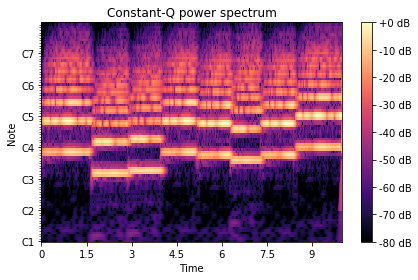

In [0]:
# Extract its features
C = np.abs(librosa.cqt(y, sr=sr, hop_length=512, n_bins=84, bins_per_octave=12))
librosa.display.specshow(librosa.amplitude_to_db(C[:,:], ref=np.max),sr=sr, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrum')
plt.tight_layout()
plt.show()

In [0]:
# We Transpose the values
C = C.T

In [0]:
# The class probability
p_y_num = 224.0
p_y_den = 24864.0

# We traverse the train segments
predictions = []
for segment in C:
  # We initialize the max values we have seen
  max_likely_cat = ""
  max_prob_seen = -1.0
  
  # We again traverse all categories to see which is the most likely
  for prediction_famnote_label, row in means_per_category.iterrows():
    current_prob = 1.0

    for i in range(84):
      current_prob *= Gaussian_PDF(
                segment[i],
                means_per_category.loc[prediction_famnote_label][means_per_category.columns[i]],
                variances_per_category.loc[prediction_famnote_label][variances_per_category.columns[i]]
              )
        
    current_prob *= p_y_num
    current_prob /= p_y_den

    if (current_prob > max_prob_seen):
      max_prob_seen = current_prob
      max_likely_cat = prediction_famnote_label

  if(len(predictions) == 0):
    print(max_likely_cat)
    predictions.append(max_likely_cat)
  else:
    if (max_likely_cat != predictions[-1]):
      print(max_likely_cat)
      predictions.append(max_likely_cat)

family_brass_note_60
family_brass_note_58
family_string_note_58
family_brass_note_51
family_string_note_50
family_brass_note_51
family_brass_note_52
family_string_note_50
family_string_note_33
family_string_note_58
family_brass_note_58
family_brass_note_57
family_brass_note_56
family_brass_note_57
family_brass_note_56
family_brass_note_57
family_brass_note_56
family_brass_note_55
family_brass_note_56
family_brass_note_57
family_brass_note_56
family_brass_note_57
family_brass_note_58
family_brass_note_48
family_brass_note_59
family_brass_note_60
family_string_note_60
family_brass_note_48


## Second Test

Family: Guitar

Instrument: Nylon Concert Guitar 

App: Ableton Live 10 Lite

In [0]:
# We Get the audio file
!wget -O Guitar_Nylon_Ableton.wav https://github.com/Sirivasv/MCC-AA/raw/master/ProyectoFinal/further_test_audios/Guitar_Nylon_Ableton.wav

--2020-06-12 11:07:12--  https://github.com/Sirivasv/MCC-AA/raw/master/ProyectoFinal/further_test_audios/Guitar_Nylon_Ableton.wav
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Sirivasv/MCC-AA/master/ProyectoFinal/further_test_audios/Guitar_Nylon_Ableton.wav [following]
--2020-06-12 11:07:13--  https://raw.githubusercontent.com/Sirivasv/MCC-AA/master/ProyectoFinal/further_test_audios/Guitar_Nylon_Ableton.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 882044 (861K) [audio/wav]
Saving to: ‘Guitar_Nylon_Ableton.wav’

Guitar_Nylon_Ableto 100%[===================>] 861.37K  2.16MB/s    in 0.4s    

2020-06-12 11:07:14 (2.16 MB/s) - ‘G

In [0]:
filename = "Guitar_Nylon_Ableton.wav"
y, sr = librosa.load(filename, sr=None)
IPython.display.Audio(data=y, rate=sr)

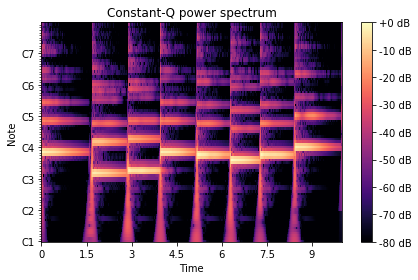

In [0]:
# Extract its features
C = np.abs(librosa.cqt(y, sr=sr, hop_length=512, n_bins=84, bins_per_octave=12))
librosa.display.specshow(librosa.amplitude_to_db(C[:,:], ref=np.max),sr=sr, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrum')
plt.tight_layout()
plt.show()

In [0]:
# We Transpose the values
C = C.T

In [0]:
# The class probability
p_y_num = 224.0
p_y_den = 24864.0

# We traverse the train segments
predictions = []
for segment in C:
  # We initialize the max values we have seen
  max_likely_cat = ""
  max_prob_seen = -1.0
  
  # We again traverse all categories to see which is the most likely
  for prediction_famnote_label, row in means_per_category.iterrows():
    current_prob = 1.0

    for i in range(84):
      current_prob *= Gaussian_PDF(
                segment[i],
                means_per_category.loc[prediction_famnote_label][means_per_category.columns[i]],
                variances_per_category.loc[prediction_famnote_label][variances_per_category.columns[i]]
              )
        
    current_prob *= p_y_num
    current_prob /= p_y_den

    if (current_prob > max_prob_seen):
      max_prob_seen = current_prob
      max_likely_cat = prediction_famnote_label

  if(len(predictions) == 0):
    print(max_likely_cat)
    predictions.append(max_likely_cat)
  else:
    if (max_likely_cat != predictions[-1]):
      print(max_likely_cat)
      predictions.append(max_likely_cat)

family_string_note_30
family_guitar_note_25
family_guitar_note_58
family_brass_note_58
family_brass_note_59
family_string_note_58
family_string_note_25
family_string_note_24
family_guitar_note_50
family_string_note_50
family_brass_note_50
family_string_note_38
family_string_note_31
family_string_note_25
family_guitar_note_50
family_guitar_note_24
family_guitar_note_32
family_guitar_note_39
family_guitar_note_51
family_string_note_51
family_brass_note_51
family_string_note_39
family_brass_note_27
family_guitar_note_51
family_guitar_note_39
family_guitar_note_50
family_string_note_24
family_guitar_note_25
family_guitar_note_46
family_guitar_note_58
family_string_note_58
family_brass_note_58
family_string_note_58
family_string_note_39
family_guitar_note_58
family_string_note_25
family_guitar_note_25
family_guitar_note_57
family_string_note_57
family_brass_note_57
family_brass_note_56
family_string_note_58
family_string_note_45
family_guitar_note_58
family_string_note_25
family_guitar_note

## Third Test

Family: String

Instrument: Cello (BBC Symphony Orchestra Discover)

App: Ableton Live 10 Lite

In [0]:
# We Get the audio file
!wget -O String_Cello_Ableton.wav https://github.com/Sirivasv/MCC-AA/raw/master/ProyectoFinal/further_test_audios/String_Cello_Ableton.wav

--2020-06-12 11:54:21--  https://github.com/Sirivasv/MCC-AA/raw/master/ProyectoFinal/further_test_audios/String_Cello_Ableton.wav
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Sirivasv/MCC-AA/master/ProyectoFinal/further_test_audios/String_Cello_Ableton.wav [following]
--2020-06-12 11:54:22--  https://raw.githubusercontent.com/Sirivasv/MCC-AA/master/ProyectoFinal/further_test_audios/String_Cello_Ableton.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 882044 (861K) [audio/wav]
Saving to: ‘String_Cello_Ableton.wav’

String_Cello_Ableto 100%[===================>] 861.37K   838KB/s    in 1.0s    

2020-06-12 11:54:23 (838 KB/s) - ‘St

In [0]:
filename = "String_Cello_Ableton.wav"
y, sr = librosa.load(filename, sr=None)
IPython.display.Audio(data=y, rate=sr)

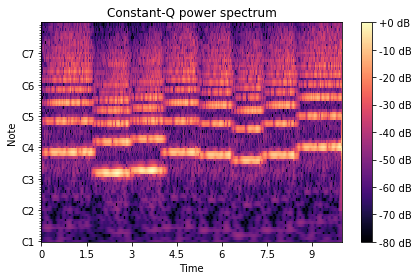

In [0]:
# Extract its features
C = np.abs(librosa.cqt(y, sr=sr, hop_length=512, n_bins=84, bins_per_octave=12))
librosa.display.specshow(librosa.amplitude_to_db(C[:,:], ref=np.max),sr=sr, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrum')
plt.tight_layout()
plt.show()

In [0]:
# We Transpose the values
C = C.T

In [0]:
# The class probability
p_y_num = 224.0
p_y_den = 24864.0

# We traverse the train segments
predictions = []
for segment in C:
  # We initialize the max values we have seen
  max_likely_cat = ""
  max_prob_seen = -1.0
  
  # We again traverse all categories to see which is the most likely
  for prediction_famnote_label, row in means_per_category.iterrows():
    current_prob = 1.0

    for i in range(84):
      current_prob *= Gaussian_PDF(
                segment[i],
                means_per_category.loc[prediction_famnote_label][means_per_category.columns[i]],
                variances_per_category.loc[prediction_famnote_label][variances_per_category.columns[i]]
              )
        
    current_prob *= p_y_num
    current_prob /= p_y_den

    if (current_prob > max_prob_seen):
      max_prob_seen = current_prob
      max_likely_cat = prediction_famnote_label

  if(len(predictions) == 0):
    print(max_likely_cat)
    predictions.append(max_likely_cat)
  else:
    if (max_likely_cat != predictions[-1]):
      print(max_likely_cat)
      predictions.append(max_likely_cat)

family_brass_note_60
family_brass_note_58
family_brass_note_53
family_brass_note_52
family_brass_note_51
family_string_note_50
family_brass_note_51
family_string_note_50
family_brass_note_51
family_string_note_43
family_brass_note_58
family_brass_note_52
family_brass_note_53
family_brass_note_52
family_brass_note_51
family_brass_note_52
family_brass_note_51
family_brass_note_52
family_brass_note_51
family_brass_note_52
family_string_note_58
family_brass_note_59
family_brass_note_58
family_brass_note_60
family_brass_note_58
family_brass_note_56
family_brass_note_57
family_brass_note_56
family_brass_note_57
family_brass_note_56
family_brass_note_57
family_brass_note_56
family_brass_note_57
family_brass_note_56
family_brass_note_57
family_brass_note_56
family_brass_note_57
family_brass_note_56
family_brass_note_57
family_brass_note_56
family_brass_note_58
family_brass_note_55
family_brass_note_56
family_brass_note_55
family_brass_note_60
family_brass_note_58
family_brass_note_56
family_br

## Fourth Test

Family: Brass

Instrument: French Horn

App: GarageBand for iOS

In [0]:
# We Get the audio file
!wget -O Brass_FrenchHorn_GarageBand.wav https://github.com/Sirivasv/MCC-AA/raw/master/ProyectoFinal/further_test_audios/Brass_FrenchHorn_GarageBand.wav

--2020-06-12 12:43:02--  https://github.com/Sirivasv/MCC-AA/raw/master/ProyectoFinal/further_test_audios/Brass_FrenchHorn_GarageBand.wav
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Sirivasv/MCC-AA/master/ProyectoFinal/further_test_audios/Brass_FrenchHorn_GarageBand.wav [following]
--2020-06-12 12:43:03--  https://raw.githubusercontent.com/Sirivasv/MCC-AA/master/ProyectoFinal/further_test_audios/Brass_FrenchHorn_GarageBand.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1441992 (1.4M) [audio/wav]
Saving to: ‘Brass_FrenchHorn_GarageBand.wav’

Brass_FrenchHorn_Ga 100%[===================>]   1.38M  1.45MB/s    in 0.9s    

2020-06

In [0]:
filename = "Brass_FrenchHorn_GarageBand.wav"
y, sr = librosa.load(filename, sr=None)
IPython.display.Audio(data=y, rate=sr)

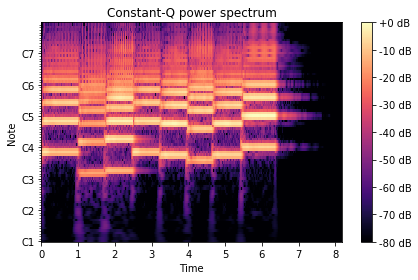

In [0]:
# Extract its features
C = np.abs(librosa.cqt(y, sr=sr, hop_length=512, n_bins=84, bins_per_octave=12))
librosa.display.specshow(librosa.amplitude_to_db(C[:,:], ref=np.max),sr=sr, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrum')
plt.tight_layout()
plt.show()

In [0]:
# We Transpose the values
C = C.T

In [0]:
# The class probability
p_y_num = 224.0
p_y_den = 24864.0

# We traverse the train segments
predictions = []
for segment in C:
  # We initialize the max values we have seen
  max_likely_cat = ""
  max_prob_seen = -1.0
  
  # We again traverse all categories to see which is the most likely
  for prediction_famnote_label, row in means_per_category.iterrows():
    current_prob = 1.0

    for i in range(84):
      current_prob *= Gaussian_PDF(
                segment[i],
                means_per_category.loc[prediction_famnote_label][means_per_category.columns[i]],
                variances_per_category.loc[prediction_famnote_label][variances_per_category.columns[i]]
              )
        
    current_prob *= p_y_num
    current_prob /= p_y_den

    if (current_prob > max_prob_seen):
      max_prob_seen = current_prob
      max_likely_cat = prediction_famnote_label

  if(len(predictions) == 0):
    print(max_likely_cat)
    predictions.append(max_likely_cat)
  else:
    if (max_likely_cat != predictions[-1]):
      print(max_likely_cat)
      predictions.append(max_likely_cat)

family_brass_note_58
family_string_note_58
family_brass_note_38
family_string_note_50
family_brass_note_50
family_brass_note_51
family_guitar_note_51
family_brass_note_39
family_brass_note_46
family_brass_note_58
family_brass_note_38
family_brass_note_57
family_string_note_57
family_brass_note_37
family_brass_note_36
family_brass_note_43
family_brass_note_55
family_brass_note_37
family_brass_note_44
family_brass_note_38
family_brass_note_45
family_brass_note_57
family_brass_note_45
family_brass_note_36
family_brass_note_48
family_brass_note_60


## Fifth Test

Family: Guitar

Instrument: Nylon Concert Guitar

App: GarageBand for iOS

In [0]:
# We Get the audio file
!wget -O Guitar_Nylon_GarageBand.wav https://github.com/Sirivasv/MCC-AA/raw/master/ProyectoFinal/further_test_audios/Guitar_Nylon_GarageBand.wav

--2020-06-12 13:20:45--  https://github.com/Sirivasv/MCC-AA/raw/master/ProyectoFinal/further_test_audios/Guitar_Nylon_GarageBand.wav
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Sirivasv/MCC-AA/master/ProyectoFinal/further_test_audios/Guitar_Nylon_GarageBand.wav [following]
--2020-06-12 13:20:45--  https://raw.githubusercontent.com/Sirivasv/MCC-AA/master/ProyectoFinal/further_test_audios/Guitar_Nylon_GarageBand.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1441992 (1.4M) [audio/wav]
Saving to: ‘Guitar_Nylon_GarageBand.wav’

Guitar_Nylon_Garage 100%[===================>]   1.38M   628KB/s    in 2.2s    

2020-06-12 13:20:50 (62

In [0]:
filename = "Guitar_Nylon_GarageBand.wav"
y, sr = librosa.load(filename, sr=None)
IPython.display.Audio(data=y, rate=sr)

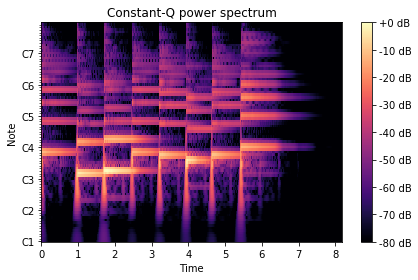

In [0]:
# Extract its features
C = np.abs(librosa.cqt(y, sr=sr, hop_length=512, n_bins=84, bins_per_octave=12))
librosa.display.specshow(librosa.amplitude_to_db(C[:,:], ref=np.max),sr=sr, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrum')
plt.tight_layout()
plt.show()

In [0]:
# We Transpose the values
C = C.T

In [0]:
# The class probability
p_y_num = 224.0
p_y_den = 24864.0

# We traverse the train segments
predictions = []
for segment in C:
  # We initialize the max values we have seen
  max_likely_cat = ""
  max_prob_seen = -1.0
  
  # We again traverse all categories to see which is the most likely
  for prediction_famnote_label, row in means_per_category.iterrows():
    current_prob = 1.0

    for i in range(84):
      current_prob *= Gaussian_PDF(
                segment[i],
                means_per_category.loc[prediction_famnote_label][means_per_category.columns[i]],
                variances_per_category.loc[prediction_famnote_label][variances_per_category.columns[i]]
              )
        
    current_prob *= p_y_num
    current_prob /= p_y_den

    if (current_prob > max_prob_seen):
      max_prob_seen = current_prob
      max_likely_cat = prediction_famnote_label

  if(len(predictions) == 0):
    print(max_likely_cat)
    predictions.append(max_likely_cat)
  else:
    if (max_likely_cat != predictions[-1]):
      print(max_likely_cat)
      predictions.append(max_likely_cat)

family_guitar_note_25
family_guitar_note_58
family_string_note_58
family_brass_note_58
family_string_note_58
family_string_note_59
family_string_note_25
family_guitar_note_50
family_string_note_50
family_string_note_31
family_string_note_24
family_guitar_note_51
family_string_note_32
family_guitar_note_51
family_string_note_51
family_brass_note_51
family_string_note_51
family_string_note_39
family_guitar_note_27
family_guitar_note_39
family_brass_note_27
family_brass_note_39
family_string_note_58
family_brass_note_58
family_string_note_58
family_string_note_46
family_string_note_39
family_guitar_note_24
family_guitar_note_25
family_guitar_note_57
family_string_note_57
family_brass_note_57
family_string_note_57
family_string_note_45
family_string_note_39
family_guitar_note_24
family_guitar_note_54
family_guitar_note_55
family_string_note_55
family_brass_note_55
family_string_note_43
family_brass_note_55
family_string_note_43
family_string_note_25
family_guitar_note_24
family_guitar_note

## Sixth Test

Family: String

Instrument: String Ensemble (Violin, Vila, Cello)

App: GarageBand for iOS

In [0]:
# We Get the audio file
!wget -O String_Ensemble_GarageBand.wav https://github.com/Sirivasv/MCC-AA/raw/master/ProyectoFinal/further_test_audios/String_Ensemble_GarageBand.wav

--2020-06-12 13:59:24--  https://github.com/Sirivasv/MCC-AA/raw/master/ProyectoFinal/further_test_audios/String_Ensemble_GarageBand.wav
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Sirivasv/MCC-AA/master/ProyectoFinal/further_test_audios/String_Ensemble_GarageBand.wav [following]
--2020-06-12 13:59:25--  https://raw.githubusercontent.com/Sirivasv/MCC-AA/master/ProyectoFinal/further_test_audios/String_Ensemble_GarageBand.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1441992 (1.4M) [audio/wav]
Saving to: ‘String_Ensemble_GarageBand.wav’

String_Ensemble_Gar 100%[===================>]   1.38M  1.26MB/s    in 1.1s    

2020-06-12 

In [0]:
filename = "String_Ensemble_GarageBand.wav"
y, sr = librosa.load(filename, sr=None)
IPython.display.Audio(data=y, rate=sr)

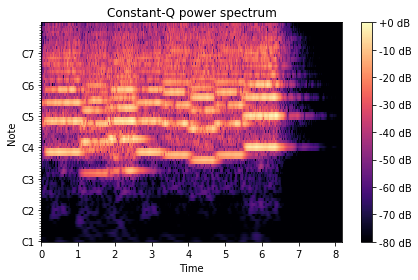

In [0]:
# Extract its features
C = np.abs(librosa.cqt(y, sr=sr, hop_length=512, n_bins=84, bins_per_octave=12))
librosa.display.specshow(librosa.amplitude_to_db(C[:,:], ref=np.max),sr=sr, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrum')
plt.tight_layout()
plt.show()

In [0]:
# We Transpose the values
C = C.T

In [0]:
# The class probability
p_y_num = 224.0
p_y_den = 24864.0

# We traverse the train segments
predictions = []
for segment in C:
  # We initialize the max values we have seen
  max_likely_cat = ""
  max_prob_seen = -1.0
  
  # We again traverse all categories to see which is the most likely
  for prediction_famnote_label, row in means_per_category.iterrows():
    current_prob = 1.0

    for i in range(84):
      current_prob *= Gaussian_PDF(
                segment[i],
                means_per_category.loc[prediction_famnote_label][means_per_category.columns[i]],
                variances_per_category.loc[prediction_famnote_label][variances_per_category.columns[i]]
              )
        
    current_prob *= p_y_num
    current_prob /= p_y_den

    if (current_prob > max_prob_seen):
      max_prob_seen = current_prob
      max_likely_cat = prediction_famnote_label

  if(len(predictions) == 0):
    print(max_likely_cat)
    predictions.append(max_likely_cat)
  else:
    if (max_likely_cat != predictions[-1]):
      print(max_likely_cat)
      predictions.append(max_likely_cat)

family_brass_note_60
family_brass_note_58
family_brass_note_46
family_brass_note_58
family_brass_note_38
family_brass_note_50
family_brass_note_38
family_brass_note_37
family_brass_note_49
family_brass_note_50
family_brass_note_49
family_brass_note_50
family_brass_note_49
family_brass_note_50
family_brass_note_51
family_string_note_51
family_brass_note_44
family_brass_note_51
family_string_note_51
family_brass_note_51
family_string_note_51
family_brass_note_51
family_string_note_51
family_brass_note_51
family_string_note_51
family_guitar_note_51
family_brass_note_38
family_string_note_58
family_guitar_note_58
family_brass_note_38
family_guitar_note_58
family_string_note_58
family_brass_note_46
family_brass_note_58
family_brass_note_46
family_brass_note_45
family_brass_note_57
family_guitar_note_57
family_brass_note_57
family_brass_note_46
family_brass_note_44
family_brass_note_43
family_brass_note_42
family_brass_note_43
family_brass_note_55
family_brass_note_43
family_brass_note_55
fa